# Import Necessary Libraries

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas_profiling

from matplotlib import rcParams
import warnings

warnings.filterwarnings("ignore")

# figure size in inches
rcParams["figure.figsize"] = 10, 6
np.random.seed(42)

# Load the Dataset

In [3]:
data = pd.read_csv('pima_indians_diabetes.csv')
data.head()

,time_pregnant_no,plasma_concentration,diastolic_blood_pressure,triceps_skinfold_thickness,serum_insulin,bmi,diabetes_pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Exploratory Data Analysis

In [4]:
data.shape

(768, 9)

In [5]:
data.isnull().sum()

time_pregnant_no              0
plasma_concentration          0
diastolic_blood_pressure      0
triceps_skinfold_thickness    0
serum_insulin                 0
bmi                           0
diabetes_pedigree             0
age                           0
class                         0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   time_pregnant_no            768 non-null    int64  
 1   plasma_concentration        768 non-null    int64  
 2   diastolic_blood_pressure    768 non-null    int64  
 3   triceps_skinfold_thickness  768 non-null    int64  
 4   serum_insulin               768 non-null    int64  
 5   bmi                         768 non-null    float64
 6   diabetes_pedigree           768 non-null    float64
 7   age                         768 non-null    int64  
 8   class                       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<AxesSubplot:xlabel='class', ylabel='count'>

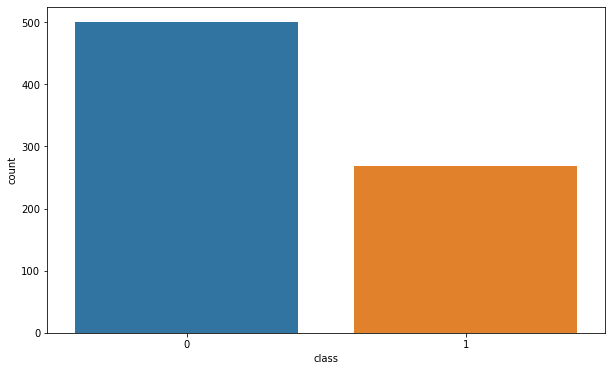

In [7]:
sns.countplot(x = 'class', data = data)

<AxesSubplot:xlabel='bmi', ylabel='age'>

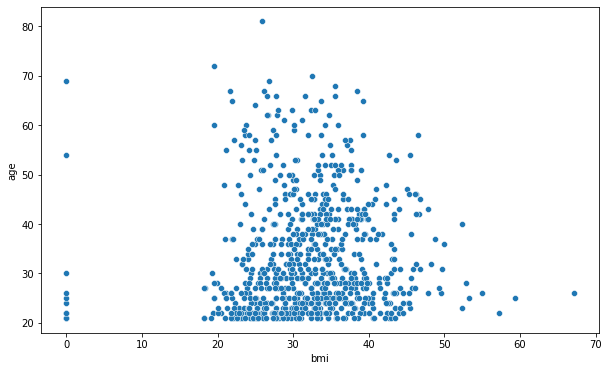

In [12]:
sns.scatterplot( x = 'bmi' , y = 'age' ,data = data)

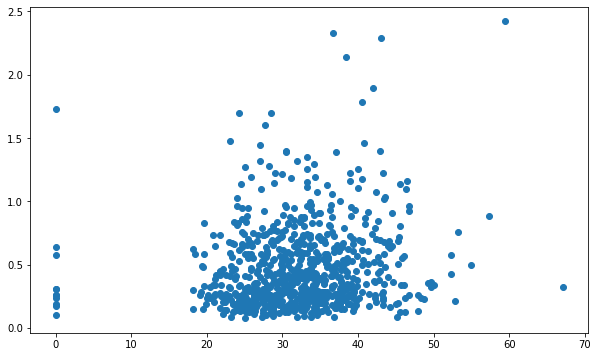

In [10]:
plt.scatter(x = 'bmi',y = 'diabetes_pedigree' , data= data)

In [13]:
# split data into input and taget variable(s)

X = data.drop("class", axis=1)
y = data["class"]

In [14]:
# standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
# split into train and test set
X_train, X_test, y_train, y_test = train_test_split( X_scaled, y, stratify=y, test_size=0.10, random_state=42)


In [16]:
classifier = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
y_pred = classifier.predict(X_test)


In [18]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8051948051948052


In [19]:
# check Important features
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": classifier.feature_importances_}
).sort_values("importance", ascending=False)

# Display
feature_importances_df

,feature,importance
1,plasma_concentration,0.267507
5,bmi,0.165052
7,age,0.127832
6,diabetes_pedigree,0.125821
2,diastolic_blood_pressure,0.088390
0,time_pregnant_no,0.084357
4,serum_insulin,0.074113
3,triceps_skinfold_thickness,0.066928


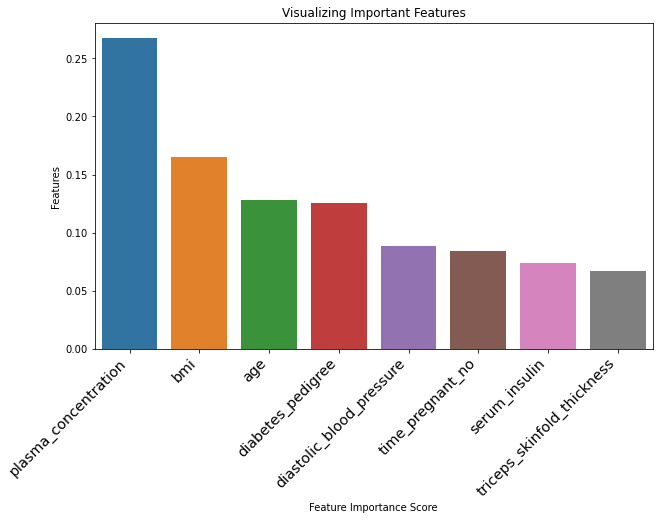

In [20]:
# visualize important featuers

# Creating a bar plot
sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)
# Add labels to your

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.show()

## Generating the Classifier on Selected Features

In [21]:

# load data with selected features
X = data.drop(["class", "triceps_skinfold_thickness"], axis=1)
y = data["class"]

# standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, stratify=y, test_size=0.10, random_state=42
)

In [22]:
# Create a Random Classifier
clf = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets
clf.fit(X_train, y_train)

# prediction on test set
y_pred = clf.predict(X_test)

# Calculate Model Accuracy,
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8181818181818182
